# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


=== Часть 1: Попадание точки в круг и треугольник ===


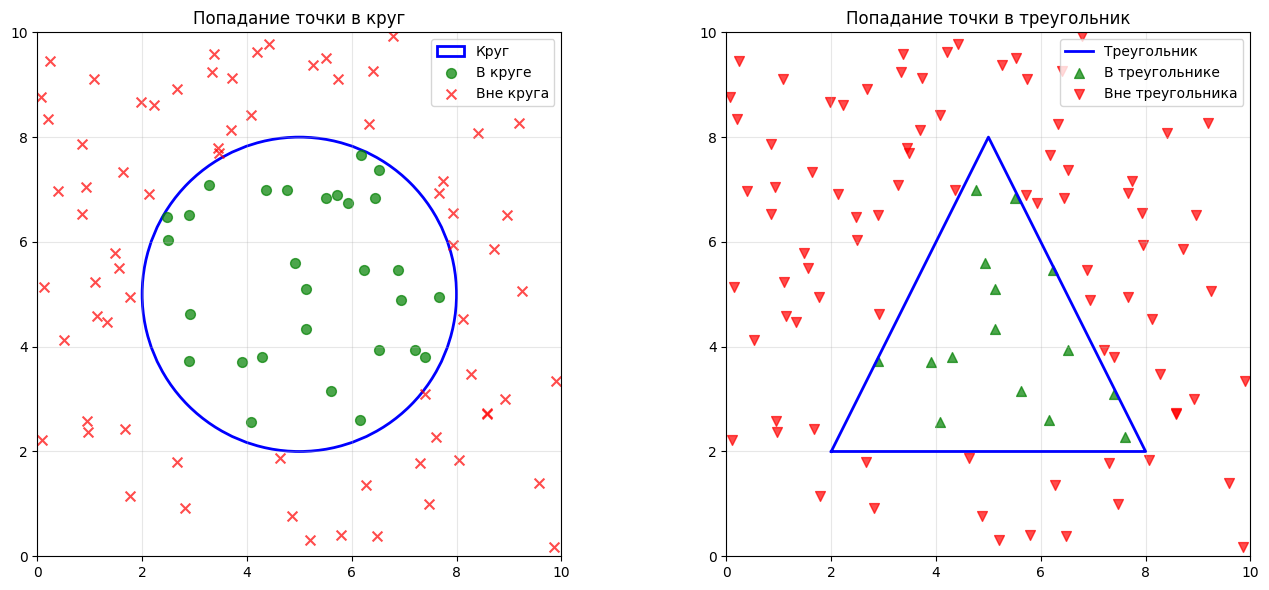

Создан круг: Circle(center=Point(5.00, 5.00), radius=3.00)
Создан треугольник: Triangle(Point(2.00, 2.00), Point(8.00, 2.00), Point(5.00, 8.00))
Всего точек: 100
Точек в круге: 29 (29.0%)
Точек в треугольнике: 15 (15.0%)

Пример проверки для точки Point(5.00, 5.00):
В круге: True
В треугольнике: True


In [3]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List

# ================== Класс Point ==================

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __str__(self) -> str:
        return f"Point({self.x:.2f}, {self.y:.2f})"
    
    def __repr__(self) -> str:
        return self.__str__()
    
    def distance_to(self, other: 'Point') -> float:
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

# ================== Класс Circle ==================

class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius
    
    def point_in_circle(self, point: Point) -> bool:
        return self.center.distance_to(point) <= self.radius
    
    def __str__(self) -> str:
        return f"Circle(center={self.center}, radius={self.radius:.2f})"

# ================== Класс Triangle ==================

class Triangle:
    def __init__(self, p1: Point, p2: Point, p3: Point):
        self.vertices = [p1, p2, p3]
        self.p1, self.p2, self.p3 = p1, p2, p3
    
    def point_in_triangle(self, point: Point) -> bool:
        # Используем барицентрические координаты
        def sign(p1: Point, p2: Point, p3: Point) -> float:
            return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)
        
        d1 = sign(point, self.p1, self.p2)
        d2 = sign(point, self.p2, self.p3)
        d3 = sign(point, self.p3, self.p1)
        
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        
        return not (has_neg and has_pos)
    
    def __str__(self) -> str:
        return f"Triangle({self.p1}, {self.p2}, {self.p3})"

# ================== Генератор случайных точек ==================

def generate_points(xmin: float, xmax: float, ymin: float, ymax: float, n: int) -> List[Point]:
    return [Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)) for _ in range(n)]

# ================== Основной код для Части 1 ==================

def part1():
    print("=== Часть 1: Попадание точки в круг и треугольник ===")
    
    # Создаем фигуры
    circle = Circle(Point(5, 5), 3)
    triangle = Triangle(Point(2, 2), Point(8, 2), Point(5, 8))
    
    # Генерируем случайные точки
    points = generate_points(0, 10, 0, 10, 100)
    
    # Проверяем попадание
    in_circle = []
    not_in_circle = []
    in_triangle = []
    not_in_triangle = []
    
    for point in points:
        if circle.point_in_circle(point):
            in_circle.append(point)
        else:
            not_in_circle.append(point)
        
        if triangle.point_in_triangle(point):
            in_triangle.append(point)
        else:
            not_in_triangle.append(point)
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Визуализация для круга
    circle_patch = patches.Circle((circle.center.x, circle.center.y), circle.radius,
                                 fill=False, edgecolor='blue', linewidth=2, label='Круг')
    ax1.add_patch(circle_patch)
    
    # Отображаем точки
    if in_circle:
        ax1.scatter([p.x for p in in_circle], [p.y for p in in_circle],
                   color='green', marker='o', label='В круге', alpha=0.7, s=50)
    if not_in_circle:
        ax1.scatter([p.x for p in not_in_circle], [p.y for p in not_in_circle],
                   color='red', marker='x', label='Вне круга', alpha=0.7, s=50)
    
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Попадание точки в круг')
    ax1.legend()
    
    # Визуализация для треугольника
    triangle_coords = [(v.x, v.y) for v in triangle.vertices]
    triangle_coords.append(triangle_coords[0])  # Замыкаем треугольник
    triangle_x, triangle_y = zip(*triangle_coords)
    ax2.plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Треугольник')
    
    # Отображаем точки
    if in_triangle:
        ax2.scatter([p.x for p in in_triangle], [p.y for p in in_triangle],
                   color='green', marker='^', label='В треугольнике', alpha=0.7, s=50)
    if not_in_triangle:
        ax2.scatter([p.x for p in not_in_triangle], [p.y for p in not_in_triangle],
                   color='red', marker='v', label='Вне треугольника', alpha=0.7, s=50)
    
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Попадание точки в треугольник')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистики
    print(f"Создан круг: {circle}")
    print(f"Создан треугольник: {triangle}")
    print(f"Всего точек: {len(points)}")
    print(f"Точек в круге: {len(in_circle)} ({len(in_circle)/len(points)*100:.1f}%)")
    print(f"Точек в треугольнике: {len(in_triangle)} ({len(in_triangle)/len(points)*100:.1f}%)")
    
    # Пример проверки для конкретной точки
    test_point = Point(5, 5)
    print(f"\nПример проверки для точки {test_point}:")
    print(f"В круге: {circle.point_in_circle(test_point)}")
    print(f"В треугольнике: {triangle.point_in_triangle(test_point)}")

# Запуск части 1
if __name__ == "__main__":
    part1()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


=== Часть 2: Пересечение отрезков и окружностей ===


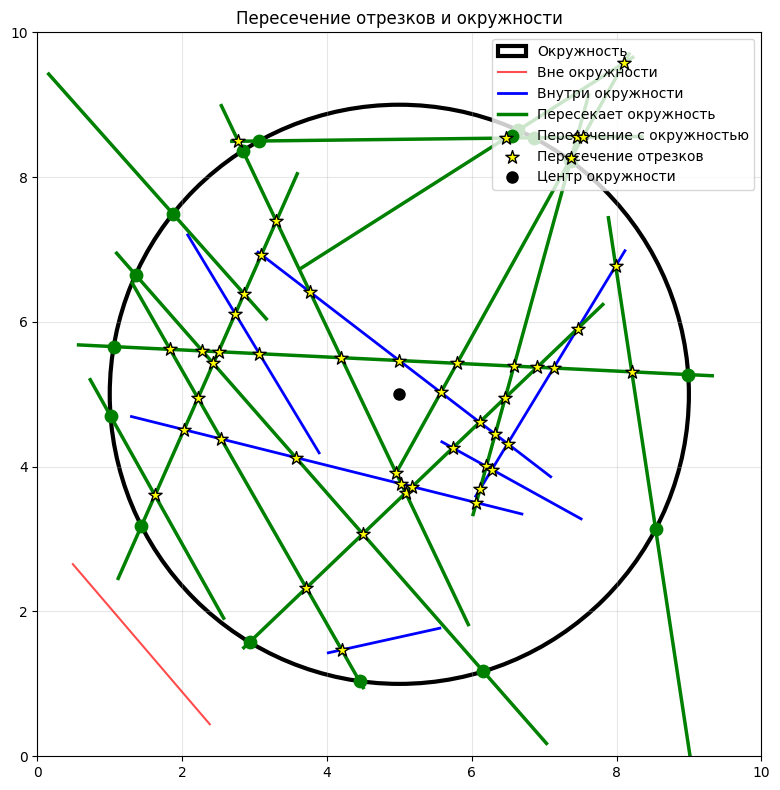

Создана окружность: Circle(center=Point(5.00, 5.00), radius=4.00)
Радиус: 4
Центр: (5, 5)

Всего отрезков: 20
Пересекают окружность: 13
Внутри окружности: 6
Вне окружности: 1
Точек пересечения с окружностью: 16
Точек пересечения отрезков: 47

Примеры проверок:
1. Отрезок Segment(Point(2.54, 8.99) -> Point(5.95, 1.82)) пересекает окружность в 1 точках:
   Точка: (2.84, 8.37)
2. Отрезок Segment(Point(2.08, 7.20) -> Point(3.89, 4.19)) полностью внутри окружности
   Длина отрезка: 3.52
3. Отрезок Segment(Point(2.54, 8.99) -> Point(5.95, 1.82)) и отрезок Segment(Point(2.08, 7.20) -> Point(3.89, 4.19))
   Не пересекаются


In [4]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Optional

# ================== Классы Point и Circle (повторяем для полноты) ==================

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __str__(self) -> str:
        return f"Point({self.x:.2f}, {self.y:.2f})"
    
    def __repr__(self) -> str:
        return self.__str__()
    
    def distance_to(self, other: 'Point') -> float:
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius
    
    def point_in_circle(self, point: Point) -> bool:
        return self.center.distance_to(point) <= self.radius
    
    def __str__(self) -> str:
        return f"Circle(center={self.center}, radius={self.radius:.2f})"

# ================== Класс Segment ==================

class Segment:
    def __init__(self, A: Point, B: Point):
        self.A = A
        self.B = B
    
    def __str__(self) -> str:
        return f"Segment({self.A} -> {self.B})"
    
    def length(self) -> float:
        return self.A.distance_to(self.B)
    
    def intersects_circle(self, circle: Circle) -> List[Point]:
        # Решение квадратного уравнения для нахождения точек пересечения
        dx = self.B.x - self.A.x
        dy = self.B.y - self.A.y
        
        A = dx**2 + dy**2
        B = 2 * (dx * (self.A.x - circle.center.x) + dy * (self.A.y - circle.center.y))
        C = (self.A.x - circle.center.x)**2 + (self.A.y - circle.center.y)**2 - circle.radius**2
        
        discriminant = B**2 - 4*A*C
        
        if discriminant < 0:
            return []
        
        t1 = (-B + math.sqrt(discriminant)) / (2*A)
        t2 = (-B - math.sqrt(discriminant)) / (2*A)
        
        intersections = []
        for t in [t1, t2]:
            if 0 <= t <= 1:
                x = self.A.x + t * dx
                y = self.A.y + t * dy
                intersections.append(Point(x, y))
        
        # Убираем дубликаты (если два корня дают одну точку)
        unique_intersections = []
        for p in intersections:
            if not any(p.distance_to(q) < 1e-10 for q in unique_intersections):
                unique_intersections.append(p)
        
        return unique_intersections
    
    def intersects_segment(self, other: 'Segment') -> Optional[Point]:
        # Проверка пересечения двух отрезков
        def orientation(p: Point, q: Point, r: Point) -> int:
            val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
            if abs(val) < 1e-10:
                return 0  # коллинеарны
            return 1 if val > 0 else 2  # по часовой или против
        
        def on_segment(p: Point, q: Point, r: Point) -> bool:
            return (q.x <= max(p.x, r.x) and q.x >= min(p.x, r.x) and
                    q.y <= max(p.y, r.y) and q.y >= min(p.y, r.y))
        
        o1 = orientation(self.A, self.B, other.A)
        o2 = orientation(self.A, self.B, other.B)
        o3 = orientation(other.A, other.B, self.A)
        o4 = orientation(other.A, other.B, self.B)
        
        # Общий случай
        if o1 != o2 and o3 != o4:
            # Находим точку пересечения
            x1, y1 = self.A.x, self.A.y
            x2, y2 = self.B.x, self.B.y
            x3, y3 = other.A.x, other.A.y
            x4, y4 = other.B.x, other.B.y
            
            denom = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
            if abs(denom) < 1e-10:
                return None
            
            t = ((x1 - x3)*(y3 - y4) - (y1 - y3)*(x3 - x4)) / denom
            intersection_x = x1 + t*(x2 - x1)
            intersection_y = y1 + t*(y2 - y1)
            
            return Point(intersection_x, intersection_y)
        
        # Специальные случаи (коллинеарность)
        if o1 == 0 and on_segment(self.A, other.A, self.B):
            return other.A
        if o2 == 0 and on_segment(self.A, other.B, self.B):
            return other.B
        if o3 == 0 and on_segment(other.A, self.A, other.B):
            return self.A
        if o4 == 0 and on_segment(other.A, self.B, other.B):
            return self.B
        
        return None

# ================== Генератор случайных отрезков ==================

def generate_segments(n: int, xmin: float, xmax: float, ymin: float, ymax: float) -> List[Segment]:
    segments = []
    for _ in range(n):
        A = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        B = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        segments.append(Segment(A, B))
    return segments

# ================== Основной код для Части 2 ==================

def part2():
    print("=== Часть 2: Пересечение отрезков и окружностей ===")
    
    # Создаем окружность
    circle = Circle(Point(5, 5), 4)
    
    # Генерируем отрезки
    segments = generate_segments(20, 0, 10, 0, 10)
    
    # Классифицируем отрезки
    intersecting_segments = []  # пересекают окружность
    inside_segments = []  # полностью внутри
    outside_segments = []  # полностью снаружи
    intersection_points = []  # точки пересечения с окружностью
    
    # Проверяем пересечения отрезков между собой
    segment_intersections = []
    
    for i, seg in enumerate(segments):
        # Проверяем пересечение с окружностью
        circle_intersections = seg.intersects_circle(circle)
        
        if circle_intersections:
            intersecting_segments.append(seg)
            intersection_points.extend(circle_intersections)
        else:
            # Проверяем, полностью ли отрезок внутри или снаружи
            A_inside = circle.point_in_circle(seg.A)
            B_inside = circle.point_in_circle(seg.B)
            
            if A_inside and B_inside:
                inside_segments.append(seg)
            else:
                outside_segments.append(seg)
        
        # Проверяем пересечение с другими отрезками
        for j, other_seg in enumerate(segments[i+1:], i+1):
            intersection = seg.intersects_segment(other_seg)
            if intersection:
                segment_intersections.append(intersection)
    
    # Визуализация
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Рисуем окружность
    circle_patch = patches.Circle((circle.center.x, circle.center.y), circle.radius,
                                 fill=False, edgecolor='black', linewidth=3, label='Окружность')
    ax.add_patch(circle_patch)
    
    # Рисуем отрезки разными цветами
    # Сначала внешние (чтобы не перекрывали другие)
    for seg in outside_segments:
        ax.plot([seg.A.x, seg.B.x], [seg.A.y, seg.B.y], 
                'r-', linewidth=1.5, alpha=0.7)
    
    # Затем внутренние
    for seg in inside_segments:
        ax.plot([seg.A.x, seg.B.x], [seg.A.y, seg.B.y], 
                'b-', linewidth=2)
    
    # Затем пересекающие
    for seg in intersecting_segments:
        ax.plot([seg.A.x, seg.B.x], [seg.A.y, seg.B.y], 
                'g-', linewidth=2.5)
    
    # Добавляем подписи для легенды
    if outside_segments:
        ax.plot([], [], 'r-', linewidth=1.5, label='Вне окружности', alpha=0.7)
    if inside_segments:
        ax.plot([], [], 'b-', linewidth=2, label='Внутри окружности')
    if intersecting_segments:
        ax.plot([], [], 'g-', linewidth=2.5, label='Пересекает окружность')
    
    # Рисуем точки пересечения с окружностью
    if intersection_points:
        ax.scatter([p.x for p in intersection_points], [p.y for p in intersection_points],
                  color='green', s=80, marker='o', zorder=5, label='Пересечение с окружностью')
    
    # Рисуем точки пересечения отрезков
    if segment_intersections:
        ax.scatter([p.x for p in segment_intersections], [p.y for p in segment_intersections],
                  color='yellow', s=100, marker='*', zorder=6, edgecolors='black',
                  label='Пересечение отрезков')
    
    # Отмечаем центр окружности
    ax.plot(circle.center.x, circle.center.y, 'ko', markersize=8, label='Центр окружности')
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Пересечение отрезков и окружности')
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистики
    print(f"Создана окружность: {circle}")
    print(f"Радиус: {circle.radius}")
    print(f"Центр: ({circle.center.x}, {circle.center.y})")
    print(f"\nВсего отрезков: {len(segments)}")
    print(f"Пересекают окружность: {len(intersecting_segments)}")
    print(f"Внутри окружности: {len(inside_segments)}")
    print(f"Вне окружности: {len(outside_segments)}")
    print(f"Точек пересечения с окружностью: {len(intersection_points)}")
    print(f"Точек пересечения отрезков: {len(segment_intersections)}")
    
    # Примеры проверок
    print("\nПримеры проверок:")
    
    # Пример 1: Отрезок, пересекающий окружность
    if intersecting_segments:
        seg = intersecting_segments[0]
        intersections = seg.intersects_circle(circle)
        print(f"1. Отрезок {seg} пересекает окружность в {len(intersections)} точках:")
        for p in intersections:
            print(f"   Точка: ({p.x:.2f}, {p.y:.2f})")
    
    # Пример 2: Отрезок внутри окружности
    if inside_segments:
        seg = inside_segments[0]
        print(f"2. Отрезок {seg} полностью внутри окружности")
        print(f"   Длина отрезка: {seg.length():.2f}")
    
    # Пример 3: Проверка пересечения двух отрезков
    if len(segments) >= 2:
        seg1 = segments[0]
        seg2 = segments[1]
        intersection = seg1.intersects_segment(seg2)
        print(f"3. Отрезок {seg1} и отрезок {seg2}")
        if intersection:
            print(f"   Пересекаются в точке: ({intersection.x:.2f}, {intersection.y:.2f})")
        else:
            print(f"   Не пересекаются")

# Запуск части 2
if __name__ == "__main__":
    part2()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


=== Часть 3: Формула Гаусса для площади многоугольника ===


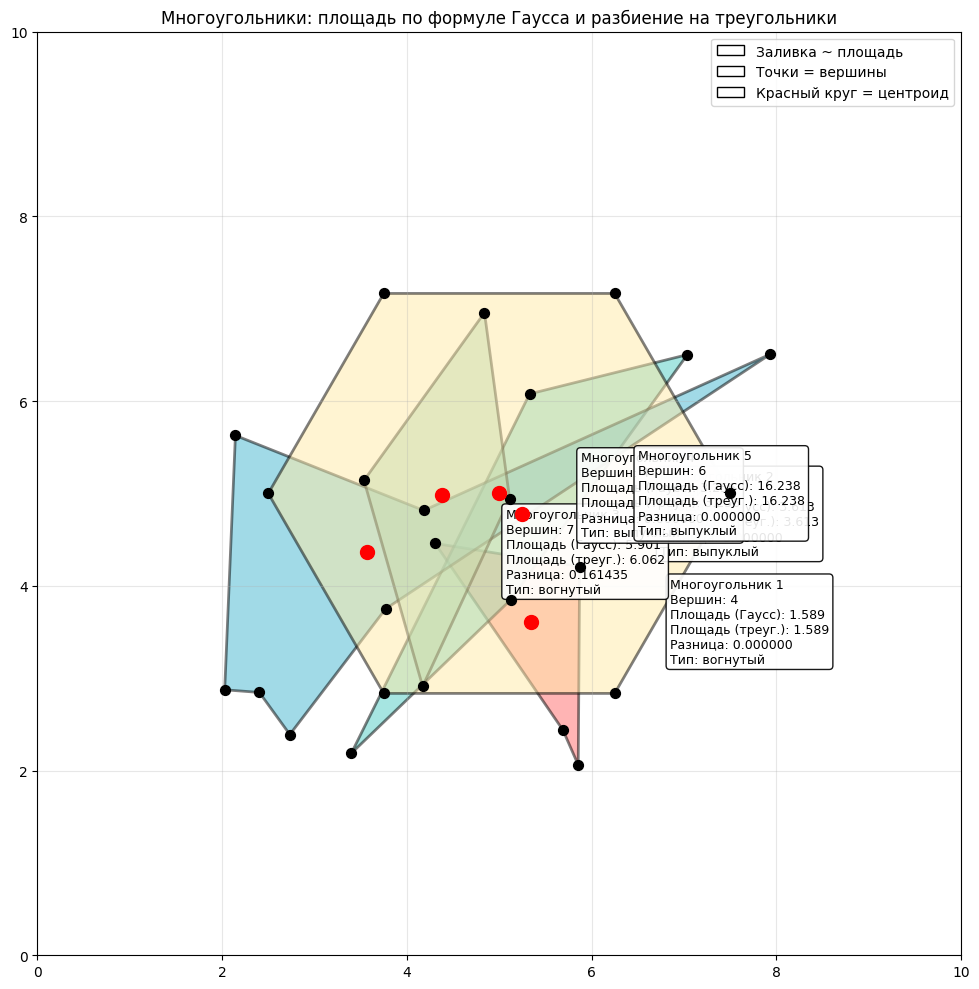


Подробная информация о многоугольниках:

Многоугольник 1:
  Количество вершин: 4
  Вершины: ['Point(5.69, 2.44)', 'Point(5.86, 2.06)', 'Point(5.87, 4.21)', 'Point(4.31, 4.46)']
  Площадь по формуле Гаусса: 1.589085
  Площадь разбиением на треугольники: 1.589085
  Разница методов: 0.0000000000
  Выпуклый: Нет
  Центроид: (5.348, 3.611)

Многоугольник 2:
  Количество вершин: 4
  Вершины: ['Point(3.40, 2.19)', 'Point(5.12, 3.85)', 'Point(7.04, 6.50)', 'Point(5.33, 6.08)']
  Площадь по формуле Гаусса: 3.612712
  Площадь разбиением на треугольники: 3.612712
  Разница методов: 0.0000000000
  Выпуклый: Да
  Центроид: (5.242, 4.778)

Многоугольник 3:
  Количество вершин: 7
  Вершины: ['Point(2.03, 2.87)', 'Point(2.40, 2.85)', 'Point(2.73, 2.39)', 'Point(3.77, 3.75)', 'Point(7.94, 6.51)', 'Point(4.18, 4.82)', 'Point(2.14, 5.63)']
  Площадь по формуле Гаусса: 5.900641
  Площадь разбиением на треугольники: 6.062076
  Разница методов: 0.1614346856
  Выпуклый: Нет
  Центроид: (3.569, 4.370)

Много

In [5]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List

# ================== Класс Point ==================

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __str__(self) -> str:
        return f"Point({self.x:.2f}, {self.y:.2f})"
    
    def __repr__(self) -> str:
        return self.__str__()
    
    def distance_to(self, other: 'Point') -> float:
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

# ================== Класс Polygon ==================

class Polygon:
    def __init__(self, vertices: List[Point]):
        if len(vertices) < 3:
            raise ValueError("Polygon must have at least 3 vertices")
        self.vertices = vertices
    
    def __str__(self) -> str:
        verts_str = ", ".join(str(v) for v in self.vertices)
        return f"Polygon({verts_str})"
    
    def area(self) -> float:
        """Вычисление площади по формуле Гаусса (шнуровки)"""
        n = len(self.vertices)
        area_sum = 0
        
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i + 1) % n].x, self.vertices[(i + 1) % n].y
            area_sum += x1 * y2 - x2 * y1
        
        return abs(area_sum) / 2
    
    def is_convex(self) -> bool:
        """Проверка выпуклости многоугольника"""
        n = len(self.vertices)
        if n < 3:
            return False
        
        def cross_product(o: Point, a: Point, b: Point) -> float:
            return (a.x - o.x) * (b.y - o.y) - (a.y - o.y) * (b.x - o.x)
        
        # Проверяем знак векторного произведения для всех последовательных троек вершин
        product_sign = None
        for i in range(n):
            o = self.vertices[i]
            a = self.vertices[(i + 1) % n]
            b = self.vertices[(i + 2) % n]
            
            cross = cross_product(o, a, b)
            if abs(cross) > 1e-10:  # Игнорируем очень маленькие значения
                if product_sign is None:
                    product_sign = 1 if cross > 0 else -1
                elif product_sign * cross < 0:
                    return False
        
        return True
    
    def centroid(self) -> Point:
        """Вычисление центра масс многоугольника"""
        n = len(self.vertices)
        if n == 0:
            return Point(0, 0)
        
        cx, cy = 0, 0
        area = self.area()
        
        if abs(area) < 1e-10:  # Очень маленькая площадь
            # Возвращаем среднее арифметическое координат
            avg_x = sum(v.x for v in self.vertices) / n
            avg_y = sum(v.y for v in self.vertices) / n
            return Point(avg_x, avg_y)
        
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i + 1) % n].x, self.vertices[(i + 1) % n].y
            
            factor = x1 * y2 - x2 * y1
            cx += (x1 + x2) * factor
            cy += (y1 + y2) * factor
        
        cx /= (6 * area)
        cy /= (6 * area)
        
        return Point(cx, cy)
    
    def area_by_triangulation(self) -> float:
        """Вычисление площади разбиением на треугольники (для проверки)"""
        if len(self.vertices) < 3:
            return 0
        
        # Разбиваем на треугольники от первой вершины
        area = 0
        p1 = self.vertices[0]
        
        for i in range(1, len(self.vertices) - 1):
            p2 = self.vertices[i]
            p3 = self.vertices[i + 1]
            
            # Площадь треугольника по формуле Герона
            a = p1.distance_to(p2)
            b = p2.distance_to(p3)
            c = p3.distance_to(p1)
            s = (a + b + c) / 2
            triangle_area = math.sqrt(s * (s - a) * (s - b) * (s - c))
            area += triangle_area
        
        return area

# ================== Генераторы многоугольников ==================

def generate_polygons(n: int, xmin: float, xmax: float, ymin: float, ymax: float, 
                     min_sides: int = 3, max_sides: int = 8) -> List[Polygon]:
    polygons = []
    for _ in range(n):
        sides = random.randint(min_sides, max_sides)
        vertices = []
        
        # Создаем случайные точки
        for _ in range(sides):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            vertices.append(Point(x, y))
        
        # Сортируем по углу для создания выпуклого многоугольника
        center_x = sum(p.x for p in vertices) / sides
        center_y = sum(p.y for p in vertices) / sides
        vertices.sort(key=lambda p: math.atan2(p.y - center_y, p.x - center_x))
        
        polygons.append(Polygon(vertices))
    
    return polygons

def generate_regular_polygon(sides: int, center: Point, radius: float) -> Polygon:
    """Генератор правильного многоугольника"""
    vertices = []
    for i in range(sides):
        angle = 2 * math.pi * i / sides
        x = center.x + radius * math.cos(angle)
        y = center.y + radius * math.sin(angle)
        vertices.append(Point(x, y))
    
    return Polygon(vertices)

# ================== Основной код для Части 3 ==================

def part3():
    print("=== Часть 3: Формула Гаусса для площади многоугольника ===")
    
    # Генерируем случайные многоугольники
    polygons = generate_polygons(4, 2, 8, 2, 8, 4, 7)
    
    # Создаем правильный многоугольник
    regular_polygon = generate_regular_polygon(6, Point(5, 5), 2.5)
    polygons.append(regular_polygon)
    
    # Визуализация
    fig, ax = plt.subplots(figsize=(12, 10))
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    
    for i, polygon in enumerate(polygons):
        color = colors[i % len(colors)]
        
        # Получаем координаты вершин
        verts = [(v.x, v.y) for v in polygon.vertices]
        verts.append(verts[0])  # Замыкаем многоугольник
        
        x_coords, y_coords = zip(*verts)
        
        # Вычисляем площадь двумя способами
        area_gauss = polygon.area()
        area_tri = polygon.area_by_triangulation()
        centroid = polygon.centroid()
        convex = polygon.is_convex()
        
        # Рисуем многоугольник
        poly_patch = patches.Polygon(list(zip(x_coords, y_coords)), 
                                    closed=True, 
                                    facecolor=color, 
                                    alpha=0.5,
                                    edgecolor='black',
                                    linewidth=2,
                                    label=f'Многоугольник {i+1}')
        ax.add_patch(poly_patch)
        
        # Рисуем вершины
        ax.scatter([v.x for v in polygon.vertices], [v.y for v in polygon.vertices],
                  color='black', s=50, zorder=5)
        
        # Рисуем центроид
        ax.plot(centroid.x, centroid.y, 'ro', markersize=10, zorder=6)
        
        # Добавляем текст с информацией
        info_text = f"Многоугольник {i+1}\n"
        info_text += f"Вершин: {len(polygon.vertices)}\n"
        info_text += f"Площадь (Гаусс): {area_gauss:.3f}\n"
        info_text += f"Площадь (треуг.): {area_tri:.3f}\n"
        info_text += f"Разница: {abs(area_gauss - area_tri):.6f}\n"
        info_text += f"Тип: {'выпуклый' if convex else 'вогнутый'}"
        
        # Размещаем текст справа или слева от многоугольника
        text_x = centroid.x + 1.5
        text_y = centroid.y
        
        ax.text(text_x, text_y, info_text, 
                fontsize=9, ha='left', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Многоугольники: площадь по формуле Гаусса и разбиение на треугольники')
    
    # Легенда
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='white', edgecolor='black', label='Заливка ~ площадь'),
        Patch(facecolor='white', edgecolor='black', label='Точки = вершины'),
        Patch(facecolor='white', edgecolor='black', label='Красный круг = центроид'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Подробная информация о каждом многоугольнике
    print("\nПодробная информация о многоугольниках:")
    print("=" * 60)
    
    for i, polygon in enumerate(polygons):
        area_gauss = polygon.area()
        area_tri = polygon.area_by_triangulation()
        convex = polygon.is_convex()
        centroid = polygon.centroid()
        
        print(f"\nМногоугольник {i+1}:")
        print(f"  Количество вершин: {len(polygon.vertices)}")
        print(f"  Вершины: {[str(v) for v in polygon.vertices]}")
        print(f"  Площадь по формуле Гаусса: {area_gauss:.6f}")
        print(f"  Площадь разбиением на треугольники: {area_tri:.6f}")
        print(f"  Разница методов: {abs(area_gauss - area_tri):.10f}")
        print(f"  Выпуклый: {'Да' if convex else 'Нет'}")
        print(f"  Центроид: ({centroid.x:.3f}, {centroid.y:.3f})")
    
    # Сравнение правильного многоугольника с аналитической формулой
    print("\n" + "=" * 60)
    print("Проверка для правильного шестиугольника:")
    sides = 6
    radius = 2.5
    # Аналитическая формула для площади правильного n-угольника
    analytical_area = (sides * radius**2 * math.sin(2*math.pi/sides)) / 2
    gauss_area = regular_polygon.area()
    print(f"  Радиус: {radius}")
    print(f"  Количество сторон: {sides}")
    print(f"  Аналитическая площадь: {analytical_area:.6f}")
    print(f"  Площадь по Гауссу: {gauss_area:.6f}")
    print(f"  Относительная ошибка: {abs(gauss_area - analytical_area)/analytical_area*100:.6f}%")

# Запуск части 3
if __name__ == "__main__":
    part3()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [2]:
print(int(input("Введите номер в списке: "))%6)

5


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


=== Прикладная задача: Вариант 5 ===
Водохранилище 'Приозерное' (Смоленская область)
Пространственное разрешение: 3.0 м/пиксель
Порог классификации: 20 гектаров

Координаты береговой линии:
----------------------------------------
Пиксели:              Метры:
----------------------------------------
 1. (200, 100)      → ( 600.0,  300.0)
 2. (250,  80)      → ( 750.0,  240.0)
 3. (310,  85)      → ( 930.0,  255.0)
 4. (360, 105)      → (1080.0,  315.0)
 5. (400, 140)      → (1200.0,  420.0)
 6. (420, 185)      → (1260.0,  555.0)
 7. (405, 230)      → (1215.0,  690.0)
 8. (360, 260)      → (1080.0,  780.0)
 9. (300, 270)      → ( 900.0,  810.0)
10. (240, 250)      → ( 720.0,  750.0)
11. (200, 220)      → ( 600.0,  660.0)
12. (180, 180)      → ( 540.0,  540.0)
13. (175, 140)      → ( 525.0,  420.0)
14. (185, 115)      → ( 555.0,  345.0)


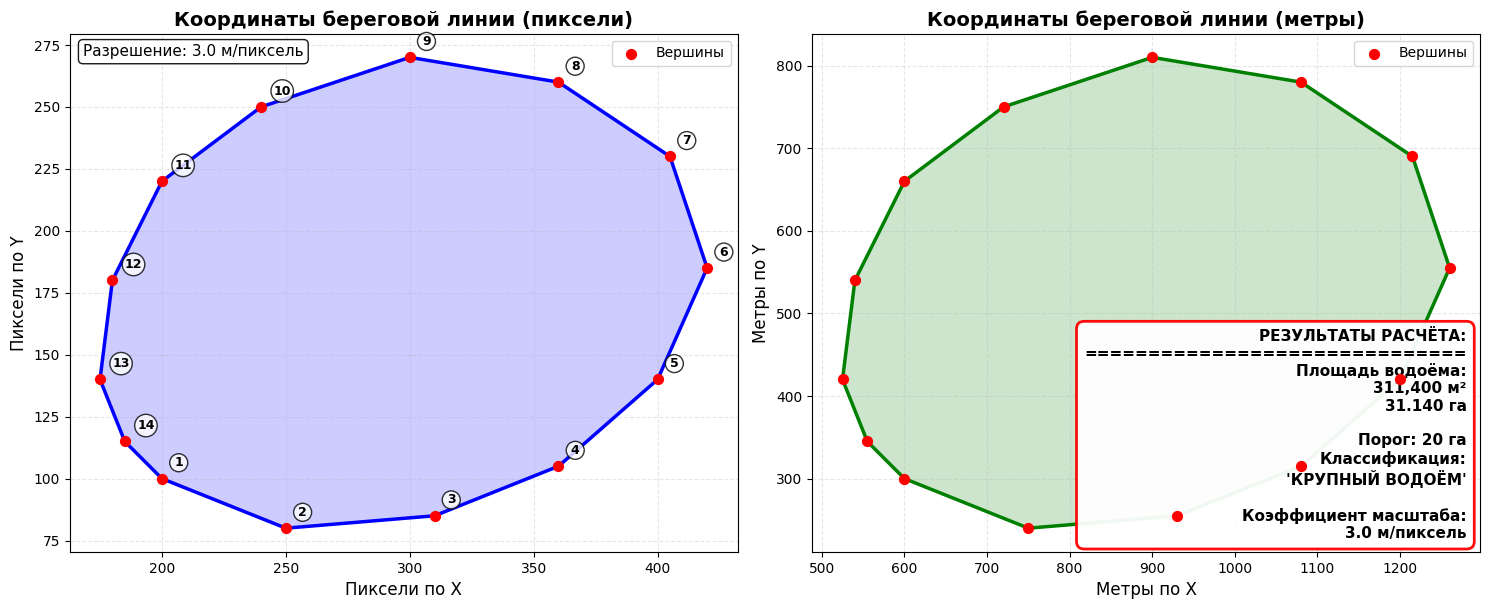


РЕЗУЛЬТАТЫ РАСЧЁТА ПЛОЩАДИ ВОДОЁМА

1. Исходные данные:
   Название объекта: Водохранилище 'Приозерное'
   Местоположение: Смоленская область
   Количество вершин: 14
   Пространственное разрешение: 3.0 м/пиксель
   Порог классификации: 20 гектаров

2. Расчёт площади:
   Площадь в квадратных метрах: 311,400.00 м²
   Площадь в гектарах: 31.1400 га
   1 га = 10 000 м²

3. Классификация объекта:
   Порог: 20 га
   Площадь водоёма: 31.1400 га
   31.1400 га ≥ 20 га → КРУПНЫЙ ВОДОЁМ

4. Дополнительная информация:
   Разница с порогом: 11.1400 га
   Относительно порога: 155.7%

5. Проверка формулы Гаусса:
   S = 1/2 * | Σ(x_i * y_{i+1} - x_{i+1} * y_i) |
   Слагаемое 1: 600.0*240.0 - 750.0*300.0 = -81,000.0
   Слагаемое 2: 750.0*255.0 - 930.0*240.0 = -31,950.0
   Слагаемое 3: 930.0*315.0 - 1080.0*255.0 = 17,550.0
   ... и ещё 11 слагаемых
   Сумма: 622,800.0
   Абсолютное значение: 622,800.0
   Площадь S = 1/2 * 622,800.0 = 311,400.0 м²

ВЫВОД:
Площадь водохранилища 'Приозерное' составляет 3

In [8]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List

# ================== Классы Point и Polygon ==================

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __str__(self) -> str:
        return f"Point({self.x:.2f}, {self.y:.2f})"
    
    def __repr__(self) -> str:
        return self.__str__()

class Polygon:
    def __init__(self, vertices: List[Point]):
        if len(vertices) < 3:
            raise ValueError("Polygon must have at least 3 vertices")
        self.vertices = vertices
    
    def __str__(self) -> str:
        verts_str = ", ".join(str(v) for v in self.vertices)
        return f"Polygon({verts_str})"
    
    def area(self) -> float:
        """Вычисление площади по формуле Гаусса (шнуровки)"""
        n = len(self.vertices)
        area_sum = 0
        
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i + 1) % n].x, self.vertices[(i + 1) % n].y
            area_sum += x1 * y2 - x2 * y1
        
        return abs(area_sum) / 2

# ================== Прикладная задача: Вариант 5 ==================

def applied_task_variant5():
    print("=== Прикладная задача: Вариант 5 ===")
    print("Водохранилище 'Приозерное' (Смоленская область)")
    print("=" * 60)
    
    # Данные для варианта 5
    pixel_coords = [
        (200, 100), (250, 80), (310, 85), (360, 105),
        (400, 140), (420, 185), (405, 230), (360, 260),
        (300, 270), (240, 250), (200, 220), (180, 180),
        (175, 140), (185, 115)
    ]
    
    resolution = 3.0  # 1 пиксель = 3.0 метра
    threshold_hectares = 20  # порог в гектарах
    
    # Преобразуем координаты из пикселей в метры
    print(f"Пространственное разрешение: {resolution} м/пиксель")
    print(f"Порог классификации: {threshold_hectares} гектаров")
    
    meter_coords = [(x * resolution, y * resolution) for x, y in pixel_coords]
    
    print("\nКоординаты береговой линии:")
    print("-" * 40)
    print("Пиксели:              Метры:")
    print("-" * 40)
    for i, ((px, py), (mx, my)) in enumerate(zip(pixel_coords, meter_coords)):
        print(f"{i+1:2d}. ({px:3d}, {py:3d})      → ({mx:6.1f}, {my:6.1f})")
    
    # Создаем точки и многоугольник
    points = [Point(x, y) for x, y in meter_coords]
    lake_polygon = Polygon(points)
    
    # Вычисляем площадь в квадратных метрах и гектарах
    area_m2 = lake_polygon.area()
    area_ha = area_m2 / 10000
    
    # Проверяем порог
    classification = "малый водоём" if area_ha < threshold_hectares else "крупный водоём"
    
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Пиксельные координаты
    pixel_verts = list(pixel_coords)
    pixel_verts.append(pixel_verts[0])  # Замыкаем многоугольник
    px, py = zip(*pixel_verts)
    
    ax1.plot(px, py, 'b-', linewidth=2.5)
    ax1.fill(px, py, 'blue', alpha=0.2)
    
    # Отмечаем вершины
    ax1.scatter([x for x, y in pixel_coords], [y for x, y in pixel_coords],
               color='red', s=50, zorder=5, label='Вершины')
    
    # Нумеруем вершины
    for i, (x, y) in enumerate(pixel_coords):
        ax1.text(x + 5, y + 5, str(i+1), fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="circle,pad=0.2", facecolor="white", alpha=0.8))
    
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_title('Координаты береговой линии (пиксели)', fontsize=14, fontweight='bold')
    ax1.set_xlabel("Пиксели по X", fontsize=12)
    ax1.set_ylabel("Пиксели по Y", fontsize=12)
    ax1.legend(loc='upper right')
    
    # Добавляем информацию о разрешении
    ax1.text(0.02, 0.98, f"Разрешение: {resolution} м/пиксель", 
             transform=ax1.transAxes, ha='left', va='top', fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    # График 2: Метровые координаты
    meter_verts = list(meter_coords)
    meter_verts.append(meter_verts[0])  # Замыкаем многоугольник
    mx, my = zip(*meter_verts)
    
    ax2.plot(mx, my, 'g-', linewidth=2.5)
    ax2.fill(mx, my, 'green', alpha=0.2)
    
    # Отмечаем вершины
    ax2.scatter([x for x, y in meter_coords], [y for x, y in meter_coords],
               color='red', s=50, zorder=5, label='Вершины')
    
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_title('Координаты береговой линии (метры)', fontsize=14, fontweight='bold')
    ax2.set_xlabel("Метры по X", fontsize=12)
    ax2.set_ylabel("Метры по Y", fontsize=12)
    ax2.legend(loc='upper right')
    
    # Вычисляем центроид для размещения текста
    sum_x = sum(x for x, y in meter_coords)
    sum_y = sum(y for x, y in meter_coords)
    center_x = sum_x / len(meter_coords)
    center_y = sum_y / len(meter_coords)
    
    # Добавляем информацию о площади
    info_text = f"РЕЗУЛЬТАТЫ РАСЧЁТА:\n"
    info_text += "=" * 30 + "\n"
    info_text += f"Площадь водоёма:\n"
    info_text += f"{area_m2:,.0f} м²\n"
    info_text += f"{area_ha:.3f} га\n\n"
    info_text += f"Порог: {threshold_hectares} га\n"
    info_text += f"Классификация:\n"
    info_text += f"'{classification.upper()}'\n\n"
    info_text += f"Коэффициент масштаба:\n"
    info_text += f"{resolution} м/пиксель"
    
    ax2.text(0.98, 0.02, info_text, transform=ax2.transAxes, 
             ha='right', va='bottom', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.95,
                     edgecolor='red', linewidth=2))
    
    plt.tight_layout()
    plt.show()
    
    # Подробные результаты
    print("\n" + "=" * 60)
    print("РЕЗУЛЬТАТЫ РАСЧЁТА ПЛОЩАДИ ВОДОЁМА")
    print("=" * 60)
    
    print(f"\n1. Исходные данные:")
    print(f"   Название объекта: Водохранилище 'Приозерное'")
    print(f"   Местоположение: Смоленская область")
    print(f"   Количество вершин: {len(pixel_coords)}")
    print(f"   Пространственное разрешение: {resolution} м/пиксель")
    print(f"   Порог классификации: {threshold_hectares} гектаров")
    
    print(f"\n2. Расчёт площади:")
    print(f"   Площадь в квадратных метрах: {area_m2:,.2f} м²")
    print(f"   Площадь в гектарах: {area_ha:.4f} га")
    print(f"   1 га = 10 000 м²")
    
    print(f"\n3. Классификация объекта:")
    print(f"   Порог: {threshold_hectares} га")
    print(f"   Площадь водоёма: {area_ha:.4f} га")
    
    if area_ha < threshold_hectares:
        print(f"   {area_ha:.4f} га < {threshold_hectares} га → МАЛЫЙ ВОДОЁМ")
    else:
        print(f"   {area_ha:.4f} га ≥ {threshold_hectares} га → КРУПНЫЙ ВОДОЁМ")
    
    print(f"\n4. Дополнительная информация:")
    print(f"   Разница с порогом: {abs(area_ha - threshold_hectares):.4f} га")
    print(f"   Относительно порога: {area_ha/threshold_hectares*100:.1f}%")
    
    # Проверка формулы
    print(f"\n5. Проверка формулы Гаусса:")
    print("   S = 1/2 * | Σ(x_i * y_{i+1} - x_{i+1} * y_i) |")
    
    # Вычисляем сумму вручную для демонстрации
    sum_value = 0
    n = len(meter_coords)
    for i in range(n):
        x1, y1 = meter_coords[i]
        x2, y2 = meter_coords[(i + 1) % n]
        term = x1 * y2 - x2 * y1
        sum_value += term
        if i < 3:  # Показываем первые 3 слагаемых
            print(f"   Слагаемое {i+1}: {x1:.1f}*{y2:.1f} - {x2:.1f}*{y1:.1f} = {term:,.1f}")
    
    if n > 3:
        print(f"   ... и ещё {n-3} слагаемых")
    
    print(f"   Сумма: {sum_value:,.1f}")
    print(f"   Абсолютное значение: {abs(sum_value):,.1f}")
    print(f"   Площадь S = 1/2 * {abs(sum_value):,.1f} = {abs(sum_value)/2:,.1f} м²")
    
    return area_ha, classification

# Запуск прикладной задачи
if __name__ == "__main__":
    area, classification = applied_task_variant5()
    
    print("\n" + "=" * 60)
    print("ВЫВОД:")
    print(f"Площадь водохранилища 'Приозерное' составляет {area:.3f} гектаров.")
    print(f"Это классифицируется как '{classification}'.")
    print("=" * 60)